In [1]:
from matplotlib import pyplot as plt
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from tifffile import TiffFile
module_path = str(Path.cwd().parents[0])  # Make PDE_Display available
if module_path not in sys.path:
    sys.path.append(module_path)
from PDE_Display import get_cell_image
%load_ext watermark

### Set the location of the results data
You can copy the following line from line 36 of `analyse_data.py`

In [2]:
WRITE_PATH = Path('D:\\', 'Temp', 'Screening_Result')
SAVE_FIGURE = [True, Path('D:\\', 'Temp','Screening_Figures')]

In [3]:
def fit_function(x, f):
    a = f['start(ns)']
    b = f['range(ns)']
    c = f['midpoint(s)']
    d = f['breakdown time(s)']
    return a + b / (1 + np.exp(-4 * (x - c)/d))

In [4]:
pth = Path(WRITE_PATH,'2019','12','05','caged','results')
well = 'D07'
N=92 # highlighted cell nr. 92
fit = pd.read_csv(Path(pth,well+'_fit.csv')).set_index('Unnamed: 0')
fit.rename(columns={"breakdown_time(s)": "breakdown time(s)"}, inplace="true")
tau = np.genfromtxt(Path(pth,well+'_tau.csv'), delimiter='\t')
datashape = tau.shape
frameinterval = 2
errorstart = 15
time = np.arange(0, datashape[1] * frameinterval, frameinterval)

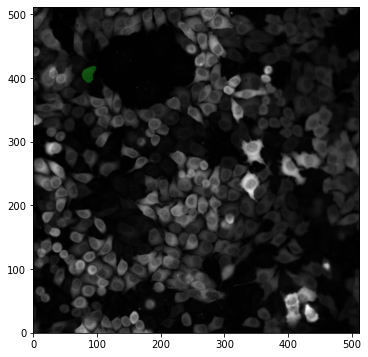

In [5]:
title = 'Figure 3A'
fig = plt.figure(figsize = (6, 6))
labelmapfile = Path(WRITE_PATH,'2019','12','05','caged','labelmap_data','C07_I_mean_labelmap.tif')
meanfile = Path(WRITE_PATH,'2019','12','05','caged','intensity_data','C07_I_mean.tif')
highlighted_ROI = get_cell_image(labelmapfile, meanfile,N)
plt.imshow(highlighted_ROI,extent=[0,512,0,512])
if SAVE_FIGURE[0]:
    SAVE_FIGURE[1].mkdir(parents=True, exist_ok=True)
    fig.savefig(Path(SAVE_FIGURE[1], title+'.svg'),dpi=600)

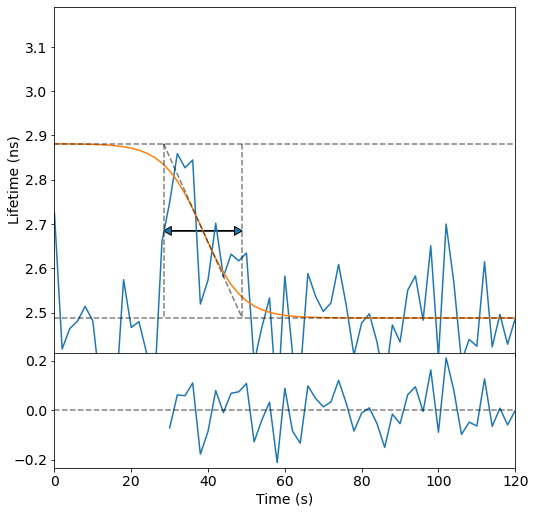

In [6]:
title = 'Figure 3B'
fig = plt.figure(figsize=(8, 8))
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
axs = [fig.add_axes([0.1, 0.3, 0.8, 0.6]),
       fig.add_axes([0.1, 0.1, 0.8, 0.2])]
axs[0].plot(time, tau[N])
axs[0].plot(time, fit_function(time, fit.iloc[N]))
upperbound = fit.iloc[N]['start(ns)']
axs[0].plot(time, np.repeat(upperbound, datashape[1]),'--k', alpha=0.5)
lowerbound = fit.iloc[N]['start(ns)']+fit.iloc[N]['range(ns)']
axs[0].plot(time, np.repeat(lowerbound, datashape[1]),'--k', alpha=0.5)
t_mid = fit.iloc[N]['midpoint(s)']
t_min = t_mid-fit.iloc[N]['breakdown time(s)']/2
t_max = t_mid+fit.iloc[N]['breakdown time(s)']/2
axs[0].plot([t_min, t_max], [upperbound,lowerbound],'--k', alpha=0.5)
axs[0].plot([t_min, t_min], [upperbound,lowerbound],'--k', alpha=0.5)
axs[0].plot([t_max, t_max], [upperbound,lowerbound],'--k', alpha=0.5)
axs[0].arrow(t_mid, (upperbound+lowerbound)/2, 
             fit.iloc[N]['breakdown time(s)']/2, 0,
             length_includes_head = True,
             head_width = 0.02,
             head_length = 2)
axs[0].arrow(t_mid, (upperbound+lowerbound)/2, 
             -fit.iloc[N]['breakdown time(s)']/2, 0,
             length_includes_head = True,
             head_width = 0.02,
             head_length = 2)
axs[0].set(xticklabels=[])
error = tau[N]-fit_function(time, fit.iloc[N])
error[0:errorstart] = np.nan
axs[1].plot(time, error)
axs[1].plot(time, np.repeat(0, datashape[1]),'k--', alpha=0.5)
axs[0].set_ylabel('Lifetime (ns)')
axs[1].set_xlabel('Time (s)')
axs[0].set_xlim([0,120])
axs[1].set_xlim([0,120])
axs[0].set_ylim([2.41,3.19])
if SAVE_FIGURE[0]:
    SAVE_FIGURE[1].mkdir(parents=True, exist_ok=True)
    fig.savefig(Path(SAVE_FIGURE[1], title+'.svg'),dpi=600)

In [7]:
print("Package versions used to generate this Notebook:")
%watermark --iversions

Package versions used to generate this Notebook:
matplotlib: 3.4.1
pandas    : 1.2.4
sys       : 3.9.2 | packaged by conda-forge | (default, Feb 21 2021, 04:59:43) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.20.2

